# Reporte 4

**PARTE 1: LECTURA**

El artículo del profesor Waldo Mendoza tiene como pregunta de investigación si es posible la modelación de una política monetaria no convencional en donde se busca incorporar las innovaciones de la política monetaria aplicadas durante la crisis económica mundial del 2008. En el paper se menciona como la política monetaria mundial cambio cuando la primera economía del mundo (EEUU) aplicó cambios mediante la Reserva Federal al administrar la tasa de interés de corto plazo y no la oferta monetaria. El autor explica que todos los cambios en politica economica estadounidense apartir de la crisis se puede explica mediante modelos Keynesianos de mercado de bienes incluyendo a los bonos para entender lo que hizo el FED para frenar la crisis.

El gran aporte del profesor Waldo es la revalorización de los modelos IS-LM-BB keynesianos, ya que la FED fue más allá e innovo junto a modelos keynesianos. Tambien se rescata estos intentos de innovación y no irse por el camino facil como menciona el autor con el ejemplo de la liquidez ¨“tasa de interés baja tanto que casi todos prefieren efectivo en lugar de adquirir deuda con tan baja rentabilidad”, en ese sentido, el analisis de las practicas de la FED fueron de gran importancia para el analisis macroeconomico.

Una debilidad en el articulo podria ser que los efectos a posteriri de las politicas economicas y monetarias aplicadas durante un contexto de crisis no se veían contempladas ya que era parte del contexto actuar rapido. Quizas hubiera sido interesante evaluar las repercusiones a largo plazo de estas políticas.

Finalmente, el paper ayuda a evaluar las soluciones dadas por grandes potencias como EEUU ante crisis mundiales que como mencionaba Amartya Sen en ese entonces ¨La crisis actual, como ha ocurrido en el pasado, requiere de la intervención de los Estados y la falta de demanda por parte del sector privado debe suplirse mediante los planes de rescate articulados por el Sector Público y dirigidos a incrementar la demanda¨ en ese sentido, encuentro importante seguir indagando en la cooperación entre ambos mercados para apoyar los modelos keynesianos.

**PARTE 2: CÓDIGO**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

$$PREGUNTA 1$$

1.1 Encuentre las ecuaciones de Ingreso $(Y^e)$ y tasa de interes $(r^e)$ de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).

**RPTA**

Antes de encontrar las ecuaciones de los puntos de equilibrio de Ingreso ($(Y^e)$) y la tasa de interes $(r^e)$ se debe tener en cuenta los dos mercados en las que estas ecuaciones actuan. En ese sentido esos dos mercados se ven representados por la curva LM-IS. Si bien ambas curvas son distintas, tienen un punto de equilibrio en donde las variables de ingreso y tasa de interes importan

Primero colocamos las ecuaciones de ambas curvas:

$LM:$ $r = - (1/j)*(Ms/P) + (k/j)*Y$

$IS:$ $r =(Co+Io+Xo)/h-((1-(b-m)*(1-t) ) / h)*Y$

Luego igualamos ambas ecuaciones: 

$(Co+Io+Xo)/h-((1-(b-m)*(1-t) ) / h)*Y = - (1/j)*(Ms/P) + (k/j)*Y$ 

Factorizamos Y y quedaría:

$re= (k*(Co+Io+Go+Xo)/(h*k+j*(1-(b-m)*(1-t)))) + ((1-(b-m)*(1-t))/(h*k+j(1-(bm)*(1-t)))*(Ms/P)$

Para hallar el punto de equilibrio es necesario reemplazar los valores de ¨Y¨ y ¨r¨ en las ecuaciones de LM-IS. Es decir, si encuentro Y la puedo remplazar en LS-IS para hallar r o viceversa.

1.2 Grafique el equilibrio simultáneo en los mercados de bienes y de dinero. 

**RPTA**

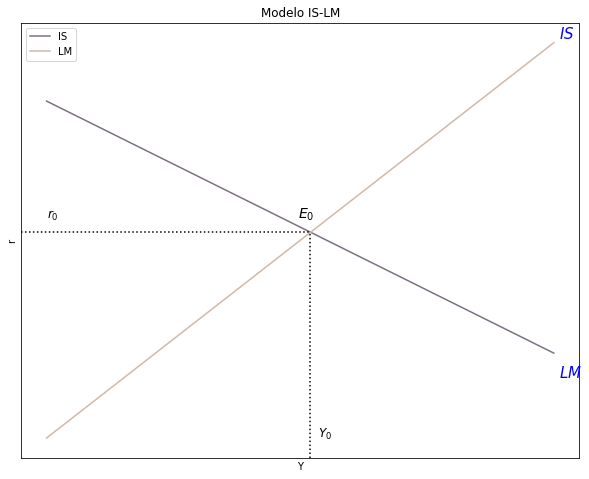

In [12]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación LM

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

#Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "#7D6E83") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "#D0B8A8")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
plt.text(100,20, '$LM$', fontsize = 15, color = 'blue')
plt.text(100,190, '$IS$', fontsize = 15, color = 'blue')
ax.set(title="Modelo IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**Estatica Comparativa**

2.1 Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal.  $( △G_o<0)$. El análisis debe ser intuitivo, matemático y gráfico. 

2.2 Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria.  $( △M^s<0)$. El análisis debe ser intuitivo, matemático y gráfico. 

2.3 Analice los efectos sobre las variables endógenas Y, r de un incremento de la tasa de impuestos.  $( △t>0)$. El análisis debe ser intuitivo, matemático y gráfico. 


**2.1**

disminución del gasto fiscal.  $( △G_o<0)$ lo cual se traduce en una política fiscal contractiva

Mercado de Bienes : 
$$ Go↓→DA↓→DA<Y→Y↓$$

Gasto del gobierno cae, por lo tanto la demanda agregada cae.

Mercado de dinero
$$Y↓→Md↓→Md<Ms→r↓$$



In [15]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


En ese sentido, el diferencia del Gasto de gobierno con respecto a Ye debe ser menor a cero

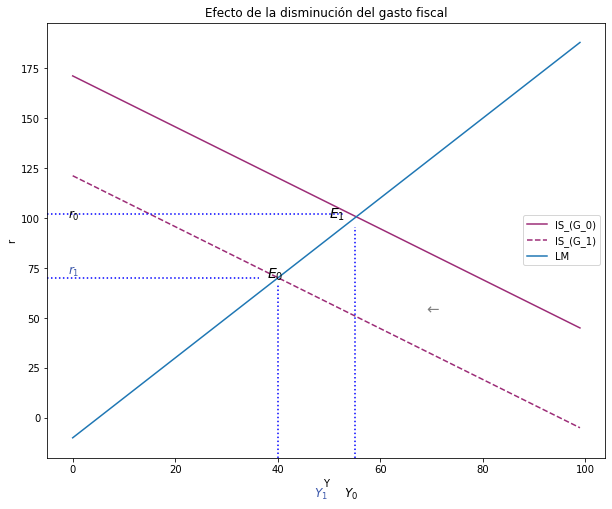

In [61]:
# Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 60
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)
#---------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 20

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

#Grafico


# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "#9C2C77") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "#9C2C77", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=40,  ymin= 0, ymax= 0.40, linestyle = ":", color = "blue")
plt.axhline(y=70, xmin= 0, xmax= 0.38, linestyle = ":", color = "blue")

plt.axvline(x=55,  ymin= 0, ymax= 0.53, linestyle = ":", color = "blue")
plt.axhline(y=102, xmin= 0, xmax= 0.53, linestyle = ":", color = "blue")
plt.text(50,100, '$E_1$', fontsize = 14, color = 'black')

plt.text(38,70, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de la disminución del gasto fiscal", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**2.2**

disminución de la masa monetaria.  $( △M^s<0)$ lo cual se traduce por intuición en una politica monetaria contractiva:

Mercado de Bienes:

$$ Ms↓→Mo↓→Mo>Md→r↑$$

Mercado de Dinero:

$$ r↑→I↓→DA<Y→Y↓$$


Si la masa monetaria cae, el mercado hace un ajuste ya que la demanda sigue igual y por lo tanto incrementa el precio del dinero debido a que no es suficiente el que ya existe. Mientras que en el mercado de dinero, si la tasa de interes auenta, la inversion se reduce haciendo que la demanda sea menor al igual que el producto el cual debe ajustarse a esta.

In [45]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  

df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  


El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))
El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


Resultado:

$$▲re= (-)(B1/h*k+jP1)*1/P * ▲Ms$$

$$▲Ye= (h/h*k+jB1)*1/p0 * ▲Ms$$


$r$ es positiva y $Ye$ es negativa por lo que hay un desplazamiento de la curva a la izquierda

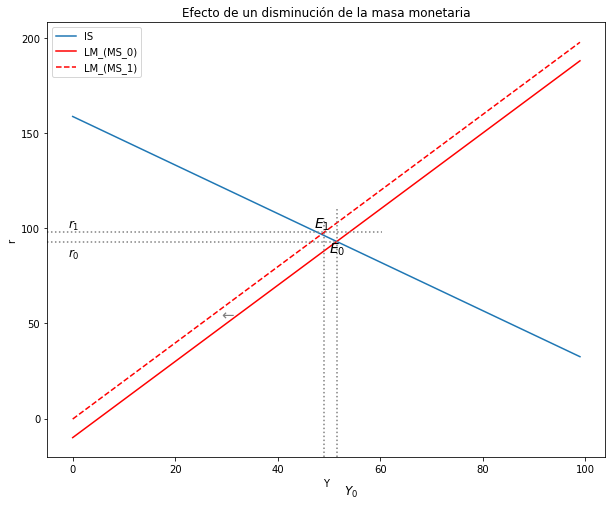

In [63]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20        

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)
# Definir SOLO el parámetro cambiado
Ms = 5

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C0") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "red")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "red", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=49,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=98, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(50,87, '$E_0$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(47,100, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
plt.text(-1,85, '$r_0$', fontsize = 12, color = 'black')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
plt.text(29, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de un disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**2.3**

Incremento de la tasa de impuestos.  $( △t>0)$

Mercado de Bienes:

$$ t↑→DA↑→DA>Y→Y↑$$

Mercado de Precios:

$$ Y↑→Md↑→Md>Ms→r↑$$

Al incrementarse la tributación, la demanda agregada tambien lo hace por lo tanto para encontrarse en equilibrio Y tambien debe aumentar. En el mercado de precio esto se refleja en que la demanda y el dinero se incrementen por lo que la oferta aumente junto a r. Matematicamente se puede entender como una factorización.

$$▲Ye= ▲(1/h*k+jB1)*(+) $$

Los mismo para $re$
$$▲re= ▲(kB0/h*k+B1) $$

C:\Users\Héctor Delgado\AppData\Local\Temp\ipykernel_10132\97305351.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(Y, r_Is, "k-", label = "IS", color = "orange")
C:\Users\Héctor Delgado\AppData\Local\Temp\ipykernel_10132\97305351.py:78: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(Y, r_Is2, "k-", label = "IS_2", linestyle = ":", color = "orange")
C:\Users\Héctor Delgado\AppData\Local\Temp\ipykernel_10132\97305351.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(Y, r_Is2, "k-", label = "IS_2", linestyle = ":", color = "orange")
C:\Users\Héctor Delgado\AppData\Local\Temp\ipykernel_10132\97305351.py:79: UserWa

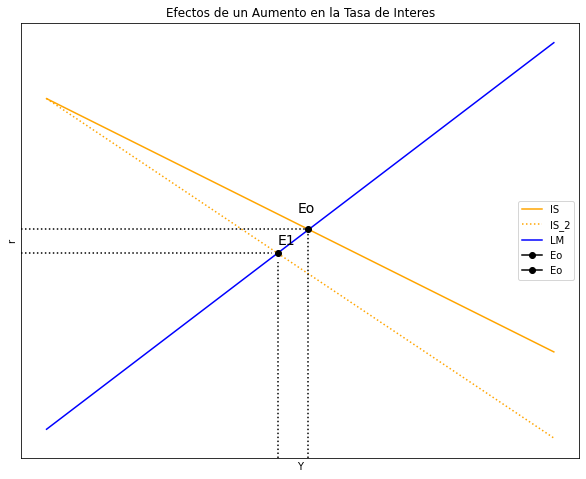

In [66]:
##Parametros

Y_size = 100 
b = 0.69                
m = 0.3                 
t = 0.2                  
C0 = 19                
I0 = 18                 
G0 = 30                  
X0 = 15                  
h =  0.7                  

Y = np.arange(Y_size)

def r_Is (b, m, t, C0, I0, G0, X0, h, Y):
    r_Is= (C0 + I0 + G0 + X0 - Y*((1-(b-m)*(1-t))/h))
    return r_Is

def Y_s (b, m, t, C0, I0, G0, X0, h, r):
    Y_s= (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y_s

r_Is = r_Is (b, m, t, C0, I0, G0, X0, h, Y)

# Grafico de la curva LM
##Parametros

Y_size = 100

Y_size = 100

K = 13.35                
J = 8.9              
Ms = 8013            
P  = 20                  

Y = np.arange(Y_size)

def LM( K, J, Ms, P, Y):
    LM = ((-Ms/P)* 1/J + K/J*Y)
    return LM

LM = LM( K, J, Ms, P, Y)

# Grafica de la curva IS_2
##Parametros

Y_size = 100 
b = 0.69                
m = 0.3                 
t = 0.8                  
C0 = 19                
I0 = 18                 
G0 = 30                  
X0 = 15                  
h =  0.7                  

Y = np.arange(Y_size)

def r_Is2 (b, m, t, C0, I0, G0, X0, h, Y):
    r_Is2= (C0 + I0 + G0 + X0 - Y*((1-(b-m)*(1-t))/h))
    return r_Is2

def Y_s2 (b, m, t, C0, I0, G0, X0, h, r):
    Y_s2= (C0 + I0 + G0 + X0 - h*r)/(1-(b-m)*(1-t))
    return Y2_s2

r_Is2 = r_Is2 (b, m, t, C0, I0, G0, X0, h, Y)

##Grafico interseccion de IS y LM

y_max = np.max(LM)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Efectos de un Aumento en la Tasa de Interes", xlabel= r'Y', ylabel= r'r')

ax.plot(Y, r_Is, "k-", label = "IS", color = "orange")
ax.plot(Y, r_Is2, "k-", label = "IS_2", linestyle = ":", color = "orange")
ax.plot(Y, LM, "b-", label="LM", color = "blue")

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())  

plt.axvline(x=51.1,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
plt.axhline(y=32, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")
plt.plot(51, 32, marker="o", color="black", label = "Eo")
plt.text(49,38, 'Eo', fontsize = 14, color = 'black')



##Parametros interseccion IS2 y LM

plt.axvline(x=45.17, ymin= 0, ymax= 0.45, linestyle = ":", color = "black")
plt.axhline(y=22.74, xmin= 0, xmax= 0.45, linestyle = ":", color = "black")
plt.plot(45.17, 22.74, marker="o", color="black", label = "Eo")
plt.text(45.17, 25.74, 'E1', fontsize = 14, color = 'black')

ax.legend()
plt.show()